In [93]:
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [94]:
import pandas as pd

# Load your dataset (replace with your file)
df = pd.read_csv("c:/Users/hp/venv/Scripts/spam.csv", encoding='ISO-8859-1')

# Now you can safely check the first five rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [95]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


In [96]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [97]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


In [98]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [99]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [100]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [101]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [102]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [103]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [104]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [105]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


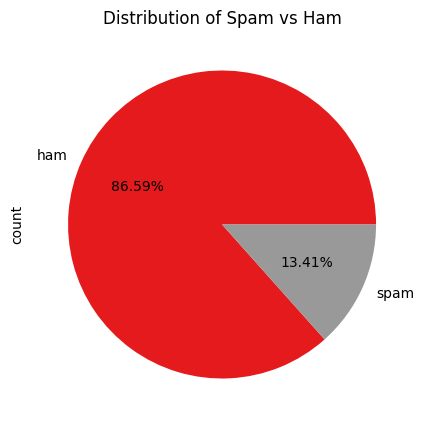

In [106]:
import matplotlib.pyplot as plt
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

In [107]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

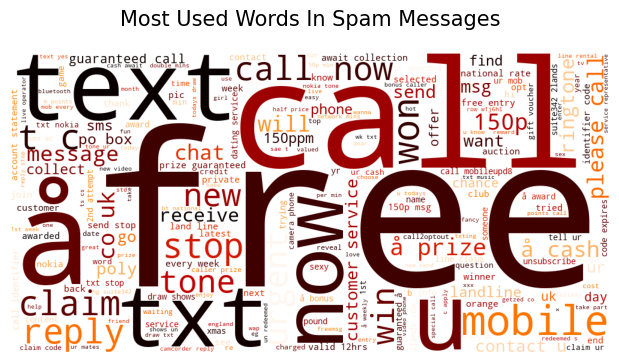

In [108]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:
    val = str(val)  # Typecast each val to string
    tokens = val.split()
    tokens = [token.lower() for token in tokens]  # Converts each token into lowercase
    comment_words += " ".join(tokens) + " "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()


In [109]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

In [110]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [111]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

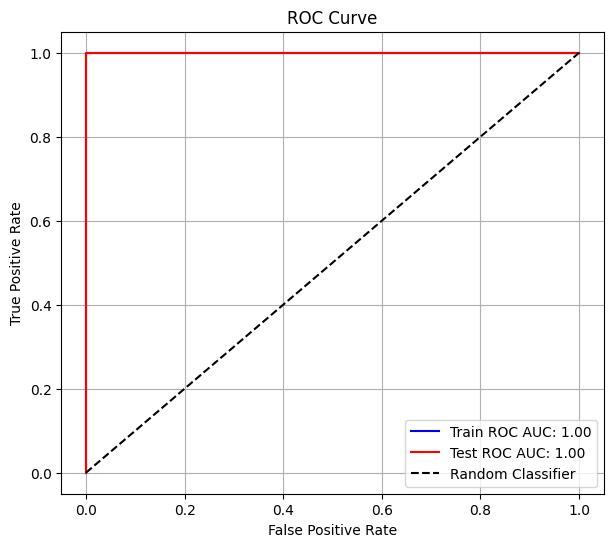

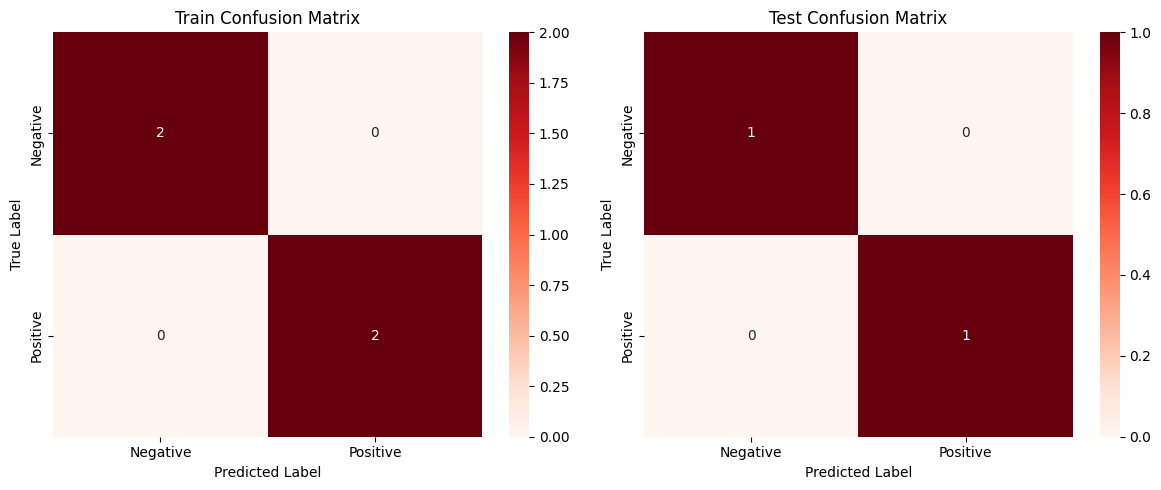

=== Train Classification Report ===
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00         2
        spam       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

=== Test Classification Report ===
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00         1
        spam       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Returned Test Accuracy: 1.0


In [3]:
# -------------------------------
# Imports
# -------------------------------
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import pandas as pd

# -------------------------------
# Sample Data
# -------------------------------
data = {
    'text': [
        'Win a free iPhone now', 
        'Meeting at 10 am', 
        'Congratulations, you won a lottery', 
        'Please submit the report', 
        'Get your free coupon today', 
        'Lunch at 1 pm'
    ],
    'label': ['spam', 'ham', 'spam', 'ham', 'spam', 'ham']
}
df = pd.DataFrame(data)

# -------------------------------
# Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.33, random_state=42, stratify=df['label']
)

# -------------------------------
# Build Pipeline (Vectorizer + Classifier)
# -------------------------------
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit the pipeline on training data
clf.fit(X_train, y_train)

# -------------------------------
# Spam Detection Function
# -------------------------------
def detect_spam(email_text):
    prediction = clf.predict([email_text])
    if prediction[0] == 'ham':
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

# -------------------------------
# Model Evaluation Function
# -------------------------------
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # ROC Curve (binary classification only)
    if hasattr(model, "predict_proba") and len(model.classes_) == 2:
        y_train_bin = label_binarize(y_train, classes=['ham','spam'])
        y_test_bin = label_binarize(y_test, classes=['ham','spam'])
        y_prob_train = model.predict_proba(X_train)[:,1]
        y_prob_test = model.predict_proba(X_test)[:,1]

        fpr_train, tpr_train, _ = roc_curve(y_train_bin, y_prob_train)
        fpr_test, tpr_test, _ = roc_curve(y_test_bin, y_prob_test)
        auc_train = auc(fpr_train, tpr_train)
        auc_test = auc(fpr_test, tpr_test)

        plt.figure(figsize=(7,6))
        plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC: {auc_train:.2f}', color='blue')
        plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC: {auc_test:.2f}', color='red')
        plt.plot([0,1],[0,1],'k--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("ROC not available (multi-class or single-class in split)")

    # Confusion Matrices
    cm_train = confusion_matrix(y_train, y_pred_train, labels=['ham','spam'])
    cm_test = confusion_matrix(y_test, y_pred_test, labels=['ham','spam'])
    display_labels = ['Negative', 'Positive']

    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds', ax=axes[0],
                xticklabels=display_labels, yticklabels=display_labels, cbar=True)
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    axes[0].set_title('Train Confusion Matrix')

    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', ax=axes[1],
                xticklabels=display_labels, yticklabels=display_labels, cbar=True)
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    axes[1].set_title('Test Confusion Matrix')
    plt.tight_layout()
    plt.show()

    print("=== Train Classification Report ===")
    print(classification_report(y_train, y_pred_train))
    print("=== Test Classification Report ===")
    print(classification_report(y_test, y_pred_test))

    return accuracy_score(y_test, y_pred_test)

# -------------------------------
# Evaluate Model
# -------------------------------
accuracy = evaluate_model(clf, X_train, X_test, y_train, y_test)
print("\nReturned Test Accuracy:", accuracy)

 


In [4]:
# -------------------------------
# Test Spam Detection
# -------------------------------
sample_email = 'you have win a iphone16promax'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!
